# Исследование медицинских орагнизаций Твери и Тверской области

Заказчиком предоставлены данные о расположении медицинских орагнизаций и о медицинских работниках в Тверской области.

## Загрузка и первичный анализ данных

In [1]:
# установка библиотеки fuzzywuzzy
!pip install fuzzywuzzy

In [2]:
# установка библиотеки haversine
!pip install haversine

In [3]:
# импорт нужных библиотек

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from fuzzywuzzy import fuzz
from haversine import haversine, Unit

/usr/local/lib/python3.11/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [4]:
# сохраним данные о сотрудниках в переменную data_stuff
data_stuff = pd.read_excel('Данные.xlsx', sheet_name='Сотрудники')

In [5]:
# сохраним данные о координатах медицинских учреждений в переменную data_coord
data_coord = pd.read_excel('Данные.xlsx', sheet_name='Координаты')

In [6]:
# зададим функцию для оценки данных

def about_table(data):
    """
    Функция выводит первые 5 строк датафрейма,
    общую информацию о датафрейме,
    первые 10 уникальных значений из каждого столбца,
    а также описательную статистику по каждому столбцу.
    """
    display(data.head())
    print('Общие данные')
    display(data.info())
    print('Данные по столбцам')

    for col in data:
        print(col)
        print(data[col].unique()[:10])

    display(data.describe(include='all'))

In [7]:
# применим функцию к датафрейму о работниках
about_table(data_stuff)

,Unnamed: 0,Дата рождения,Возраст,Пол,Организация по основной должности,Основная должность
0,1,1958-01-01,66,Муж.,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХР...,Врач-анестезиолог-реаниматолог
1,2,1968-11-13,55,Жен.,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХР...,Рентгенолаборант
2,3,1950-02-01,74,Муж.,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХР...,Врач общей практики (семейный врач)
3,4,1957-02-08,67,Муж.,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХР...,Врач-анестезиолог-реаниматолог
4,5,1974-11-14,49,Жен.,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХР...,врач общей практики (семейный врач)


Общие данные
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1419 entries, 0 to 1418
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Unnamed: 0                         1419 non-null   int64         
 1   Дата рождения                      1419 non-null   datetime64[ns]
 2   Возраст                            1419 non-null   int64         
 3   Пол                                1419 non-null   object        
 4   Организация по основной должности  1414 non-null   object        
 5   Основная должность                 1414 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 66.6+ KB


None

Данные по столбцам
Unnamed: 0
[ 1  2  3  4  5  6  7  8  9 10]
Дата рождения
<DatetimeArray>
['1958-01-01 00:00:00', '1968-11-13 00:00:00', '1950-02-01 00:00:00',
 '1957-02-08 00:00:00', '1974-11-14 00:00:00', '1957-08-29 00:00:00',
 '1946-03-10 00:00:00', '1953-04-17 00:00:00', '1966-01-18 00:00:00',
 '1965-06-29 00:00:00']
Length: 10, dtype: datetime64[ns]
Возраст
[66 55 74 67 49 78 71 58 59 63]
Пол
['Муж.' 'Жен.']
Организация по основной должности
['ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "ОБЛАСТНОЙ КЛИНИЧЕСКИЙ ПСИХОНЕВРОЛОГИЧЕСКИЙ ДИСПАНСЕР"'
 'ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "СТОМАТОЛОГИЧЕСКАЯ ПОЛИКЛИНИКА №1"'
 'ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "КАЛИНИНСКАЯ ЦЕНТРАЛЬНАЯ РАЙОННАЯ КЛИНИЧЕСКАЯ БОЛЬНИЦА"'
 'ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "КЛИНИЧЕСКАЯ БОЛЬНИЦА СКОРОЙ МЕДИЦИНСКОЙ ПОМОЩИ"'
 'ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕР

,Unnamed: 0,Дата рождения,Возраст,Пол,Организация по основной должности,Основная должность
count,1419.000000,1419,1419.000000,1419,1414,1414
unique,NaN,NaN,NaN,2,113,14
top,NaN,NaN,NaN,Жен.,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХР...,рентгенолаборант
freq,NaN,NaN,NaN,984,105,166
mean,710.000000,1978-05-05 00:13:11.543340384,45.766032,NaN,NaN,NaN
min,1.000000,1938-01-31 00:00:00,21.000000,NaN,NaN,NaN
25%,355.500000,1965-04-05 00:00:00,31.000000,NaN,NaN,NaN
50%,710.000000,1979-12-26 00:00:00,44.000000,NaN,NaN,NaN
75%,1064.500000,1992-10-04 12:00:00,59.000000,NaN,NaN,NaN
max,1419.000000,2002-09-18 00:00:00,86.000000,NaN,NaN,NaN


In [8]:
# применим функцию к датафрейму о координатах
about_table(data_coord)

,Организация по основной должности,Сокращенное название организации,Округ/район,Адрес,Координаты
0,АВТОНОМНАЯ НЕКОММЕРЧЕСКАЯ ОРГАНИЗАЦИЯ ТВЕРСКОЙ...,"АНО ""БЕЛАЯ РОЗА""",городской округ город Тверь,"170100, Тверская область, город Тверь, Тверско...","56.86053266726136, 35.909560612319325"
1,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""КОНАКОВСКИЙ ЗАВОД СТАЛЬН...","АО ""КЗСК""",Конаковский район,"171252, Тверская область, г. Конаково, ул. Про...","56.72231762064035, 36.78252888653642"
2,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХ...,"ГБУЗ ""КАШИНСКАЯ СП""",Кашинский городской округ,"Тверская область, г. Кашин, ул. Карла Маркса, ...","57.355114792071056, 37.6091387505305"
3,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХ...,"ГБУЗ ""КАШИНСКАЯ ЦРБ""",Кашинский городской округ,"171640, Тверская область, г. Кашин, ул. Вонжин...","57.35759162268202, 37.622431951037704"
4,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХ...,"ГБУЗ ""КИМРСКАЯ ЦРБ""",городской округ город Кимры,"171502, Тверская область, г. Кимры, Борковское...","56.83610336308383, 37.36593272292891"


Общие данные
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Организация по основной должности  113 non-null    object
 1   Сокращенное название организации   113 non-null    object
 2   Округ/район                        113 non-null    object
 3   Адрес                              113 non-null    object
 4   Координаты                         113 non-null    object
dtypes: object(5)
memory usage: 4.5+ KB


None

Данные по столбцам
Организация по основной должности
['АВТОНОМНАЯ НЕКОММЕРЧЕСКАЯ ОРГАНИЗАЦИЯ ТВЕРСКОЙ ОБЛАСТИ "МЕДИЦИНСКИЙ ЦЕНТР "БЕЛАЯ РОЗА"'
 'АКЦИОНЕРНОЕ ОБЩЕСТВО "КОНАКОВСКИЙ ЗАВОД СТАЛЬНЫХ КОНСТРУКЦИЙ"'
 'ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ  УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "КАШИНСКАЯ СТОМАТОЛОГИЧЕСКАЯ ПОЛИКЛИНИКА"'
 'ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ  УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "КАШИНСКАЯ ЦЕНТРАЛЬНАЯ РАЙОННАЯ БОЛЬНИЦА"'
 'ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ  УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "КИМРСКАЯ ЦЕНТРАЛЬНАЯ РАЙОННАЯ БОЛЬНИЦА"'
 'ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ  УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "САНДОВСКАЯ ЦЕНТРАЛЬНАЯ РАЙОННАЯ БОЛЬНИЦА"'
 'ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ  ОБЛАСТИ "ОСТАШКОВСКАЯ ЦЕНТРАЛЬНАЯ РАЙОННАЯ БОЛЬНИЦА"'
 'ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ  "МАКСАТИХИНСКАЯ ЦЕНТРАЛЬНАЯ РАЙОННАЯ БОЛЬНИЦА"'
 'ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "АНДРЕАПОЛЬСКАЯ 

,Организация по основной должности,Сокращенное название организации,Округ/район,Адрес,Координаты
count,113,113,113,113,113
unique,113,113,38,111,112
top,АВТОНОМНАЯ НЕКОММЕРЧЕСКАЯ ОРГАНИЗАЦИЯ ТВЕРСКОЙ...,"АНО ""БЕЛАЯ РОЗА""",городской округ город Тверь,"170026, Тверская область, город Тверь, Комсомо...","56.85261396057918, 35.8811559111127"
freq,1,1,59,2,2


## Вывод

- Есть две таблицы в файле excel: Сотрудники и Координаты.
- Названия столбцов следует привести к формату `snake_case`.
- Из датафрейма `data_stuff` следует удалить столбец `Unnamed: 0`.
- Данные столбца `Дата рождения` следует привести к формату `datetime`.
- Датафреймы можно объединить по названию медицинской организации.
- Названия специальностей медицинских работников следует привести к нижнему регистру.
- В датафрейме `data_stuff` имеются пропуски.

# Предобработка данных

In [9]:
# удалим столбец Unnamed: 0
data_stuff.drop(['Unnamed: 0'], axis=1, inplace=True)

## Переименование столбцов

In [10]:
# выведем названия столбцов data_stuff
data_stuff.columns

Index(['Дата рождения', 'Возраст', 'Пол', 'Организация по основной должности',
       'Основная должность'],
      dtype='object')

Для удобства работы с данными переименуем столбцы таким образом:

- 'Дата рождения' - 'dob',
- 'Возраст' - 'age',
- 'Пол' - 'sex',
- 'Организация по основной должности' - 'organization',
- 'Основная должность' - 'profession'
           

In [11]:
# создадим словарь из старых и новых названий столбцов
dict_stuff = {
    'Дата рождения': 'dob', 'Возраст': 'age', 'Пол': 'sex',
    'Организация по основной должности': 'organization',
    'Основная должность': 'profession'
}

In [12]:
# переименуем столбцы data_stuff
data_stuff.rename(columns=dict_stuff, inplace=True)
# проверим названия столбцов
data_stuff.columns

Index(['dob', 'age', 'sex', 'organization', 'profession'], dtype='object')

Столбцы переименованы

In [13]:
# выведем названия столбцов data_coord
data_coord.columns

Index(['Организация по основной должности', 'Сокращенное название организации',
       'Округ/район', 'Адрес', 'Координаты'],
      dtype='object')

В `data_coord` также переименуем столбцы:

- 'Организация по основной должности' - 'organization',
- 'Сокращенное назавние организации' - 'abbr_organization',
- 'Адрес' - 'address',
- 'Координаты' - 'coordinates'

In [14]:
# создадим словарь из старых и новых названий столбцов
dict_coord = {
    'Организация по основной должности': 'organization',
    'Сокращенное название организации': 'abbr_organization',
    'Адрес': 'address',
    'Координаты': 'coordinates',
    'Округ/район': 'district'
}

In [15]:
# переименуем столбцы data_coord
data_coord.rename(columns=dict_coord, inplace=True)
# проверим названия столбцов
data_coord.columns

Index(['organization', 'abbr_organization', 'district', 'address',
       'coordinates'],
      dtype='object')

Столбцы переименованы

## Преобразование типов данных

In [16]:
# Переводим данные по дате рождения в формат дат.
data_stuff['dob'] = pd.to_datetime(data_stuff['dob'])
data_stuff['dob'].head()

,dob
0,1958-01-01
1,1968-11-13
2,1950-02-01
3,1957-02-08
4,1974-11-14


## Обработка пропусков

In [17]:
# выведем на экран строки data_stuff, содержащие пропуски
data_stuff[data_stuff['profession'].isna()]

,dob,age,sex,organization,profession
180,1958-01-26,66,Муж.,NaN,NaN
565,1981-03-28,43,Жен.,NaN,NaN
736,1982-02-06,42,Муж.,NaN,NaN
928,1985-07-28,39,Жен.,NaN,NaN
1405,1996-03-05,28,Жен.,NaN,NaN


Во всех случаях отсутствуют данные о медицинской организации и о профессии работника. Эти данные важны для исследования. Кроме того, количество пропусков невелико. В связи с этим пропуски следует удалить.

In [18]:
# удалим строки с пропусками из data_stuff
data_stuff.dropna(inplace=True)
# восстановим индексы
data_stuff = data_stuff.reset_index(drop=True)
# проверим количество строк
data_stuff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1414 entries, 0 to 1413
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   dob           1414 non-null   datetime64[ns]
 1   age           1414 non-null   int64         
 2   sex           1414 non-null   object        
 3   organization  1414 non-null   object        
 4   profession    1414 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 55.4+ KB


Пропуски удалены

## Обработка дубликатов

### Явные дубликаты

In [19]:
# приведем названия специальностей в data_stuff к нижнему регистру
data_stuff['profession'] = data_stuff['profession'].str.lower()
# проверим названия специальностей
data_stuff['profession'].unique()

array(['врач-анестезиолог-реаниматолог', 'рентгенолаборант',
       'врач общей практики (семейный врач)', 'врач-терапевт участковый',
       'врач-педиатр участковый', 'врач-рентгенолог', 'врач-хирург'],
      dtype=object)

Названия специальностей приведены к одинаковому виду

In [20]:
# проверим наличие полных дубликатов
data_stuff[data_stuff.duplicated()]

,dob,age,sex,organization,profession
1225,1990-11-07,33,Муж.,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХР...,врач-анестезиолог-реаниматолог


In [21]:
# выведем на экран повторяющиеся строки
data_stuff[data_stuff['dob'] == '1990-11-07']

,dob,age,sex,organization,profession
957,1990-11-07,33,Муж.,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХР...,врач-анестезиолог-реаниматолог
1225,1990-11-07,33,Муж.,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХР...,врач-анестезиолог-реаниматолог


Мы не можем точно установить, обозначают дублирующиеся строки одного человека или разных, однако, с большей вероятностью, данный дубликат получился случайно. Поэтому дублирующую строку следует удалить.

In [22]:
# удалим дублирующие строки, сохранив последнюю из них
data_stuff = data_stuff.drop_duplicates(keep='last')
data_stuff = data_stuff.reset_index(drop=True)
# проверим, удалились ли дубликаты
data_stuff[data_stuff.duplicated()]

,dob,age,sex,organization,profession


Найдём явные дубликаты по координатам МО.

In [23]:
data_coord[data_coord['coordinates'].duplicated()]['coordinates'].values[0]

'56.85261396057918, 35.8811559111127'

In [24]:
# выведем строки с повторениями в координатах
coord = data_coord[data_coord['coordinates'].duplicated()]['coordinates'].values[0]
data_coord[data_coord['coordinates'] == coord]

,organization,abbr_organization,district,address,coordinates
95,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""СОФИ...","ООО ""СОФИТЕЛЬ Р""",городской округ город Тверь,"170001, Тверская область, г Тверь, ул Спартака...","56.85261396057918, 35.8811559111127"
102,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ХИРУ...","ООО ""ХИРУРГИЯ""",городской округ город Тверь,"170001, Тверская область, город Тверь, ул Спар...","56.85261396057918, 35.8811559111127"


In [25]:
# проверим адреса из полученных строк
data_coord[data_coord['coordinates'] == coord]['address'].unique()

array(['170001, Тверская область, г Тверь, ул Спартака, д. 42б, офис 22, 1 этаж ',
       '170001, Тверская область, город Тверь, ул Спартака, д. 42б, офис 5 '],
      dtype=object)

В данном случае две организации располагаются в одном здании.

Явные дубликаты удалены

### Неявные дубликаты

Проверим наличие неявных дубликатов по названию МО. Для этого вычислим расстояния Левенштейна между уникальными названиями МО и вывдем названия, совпадающие на 99% или более.

In [26]:
# напишем функцию
def fuzz_mo(data, col):
    """
    Функция выичисляет расстояния Левенштейна и выводит
    строки, свопадающие на 99% или более.
    """

    for med_ind, med_inst_1 in enumerate(data[col].unique()):
        if (data[col].nunique()-1) != med_ind:
            for med_inst_2 in data[col].unique()[(med_ind+1):]:
                if fuzz.ratio(med_inst_1, med_inst_2) >= 99:
                    print(med_inst_1)
                    print(med_inst_2)
                    print(50*'*')
    return

In [27]:
# применим функцию к названиям МО в data_stuff
fuzz_mo(data_stuff, 'organization')

ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "СТОМАТОЛОГИЧЕСКАЯ ПОЛИКЛИНИКА №1"
ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "СТОМАТОЛОГИЧЕСКАЯ ПОЛИКЛИНИКА №2"
**************************************************
ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "СТОМАТОЛОГИЧЕСКАЯ ПОЛИКЛИНИКА №1"
ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "СТОМАТОЛОГИЧЕСКАЯ ПОЛИКЛИНИКА № 3"
**************************************************
ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "ГОРОДСКАЯ КЛИНИЧЕСКАЯ БОЛЬНИЦА №7"
ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "ГОРОДСКАЯ КЛИНИЧЕСКАЯ БОЛЬНИЦА № 6"
**************************************************
ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "ТВЕРСКОЙ ОБЛАСТНОЙ КЛИНИЧЕСКИЙ НАРКОЛОГИЧЕСКИЙ ДИСПАНСЕР"
ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "ТВЕРСКОЙ ОБЛА

Неявных дубликатов по названию МО в `data_stuff` нет. Проверим `data_coord`.

In [28]:
# применим функцию к названиям МО в data_coord
fuzz_mo(data_coord, 'organization')

ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "ГОРОДСКАЯ КЛИНИЧЕСКАЯ БОЛЬНИЦА № 6"
ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "ГОРОДСКАЯ КЛИНИЧЕСКАЯ БОЛЬНИЦА №7"
**************************************************
ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "КОНАКОВСКАЯ ЦЕНТРАЛЬНАЯ РАЙОННАЯ БОЛЬНИЦА"
ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "СОНКОВСКАЯ ЦЕНТРАЛЬНАЯ РАЙОННАЯ БОЛЬНИЦА"
**************************************************
ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "СПИРОВСКАЯ ЦЕНТРАЛЬНАЯ РАЙОННАЯ БОЛЬНИЦА"
ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "ФИРОВСКАЯ ЦЕНТРАЛЬНАЯ РАЙОННАЯ БОЛЬНИЦА"
**************************************************
ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "СТОМАТОЛОГИЧЕСКАЯ ПОЛИКЛИНИКА № 3"
ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "СТОМА

Неявных дубликатов по названию МО в `data_coord` также нет.

In [29]:
# проверим неявные совпадения по сокращённым названиям
fuzz_mo(data_coord, 'abbr_organization')

Совпадений нет.

In [30]:
# проверим неявные совпадения по адресам
fuzz_mo(data_coord, 'address')

Совпадений нет.

## Вывод

В ходе предобработки данных:
1. заменены названия столбцов,
2. удалены пропуски,
3. найдены и устранены явные дубликаты,
4. проверено наличие неявных дубликатов.

# Разведочный анализ данных

В рамках разведочного анализа данных исследуем распределение сотрудников по специальностям, по полу и по возрасту.

## Распределение по специальностям

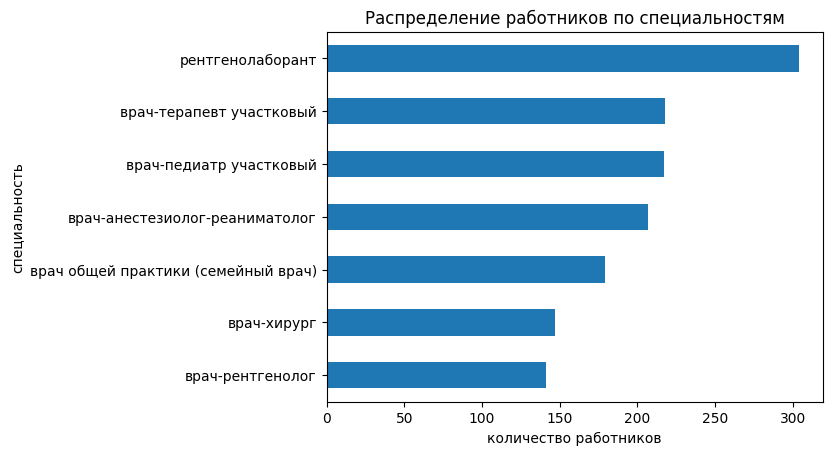

In [31]:
# построим линейную диаграмму распределния работников по специальностям
data_stuff['profession'].value_counts(ascending=True).plot(kind='barh')
plt.title('Распределение работников по специальностям')
plt.xlabel('количество работников')
plt.ylabel('специальность')
plt.show()

Среди медицинских работников больше всего - рентгенолаборантов, меньше всего - врачей-рентгенологов.

## Распределение по полу

### Общее распределение по полу

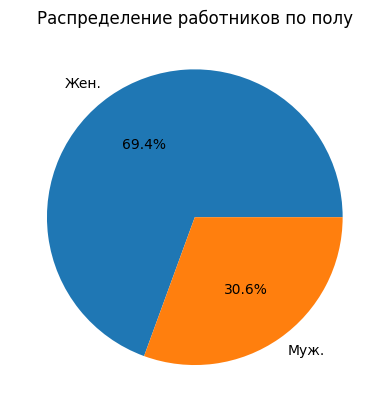

,count
sex,
Жен.,981
Муж.,432


In [32]:
# построим круговую диаграмму распределения работников по полу
plt.title('Распределение работников по полу')
labels = sorted(data_stuff['sex'].unique())
plt.pie(data_stuff['sex'].sort_values().value_counts(sort=False), labels=labels,  autopct='%.1f%%')
plt.show()

data_stuff['sex'].value_counts()

Количество женщин среди всех медицинских работников более чем в два раза превосходит количество мужчин.

### Распределение по полу для специальностей

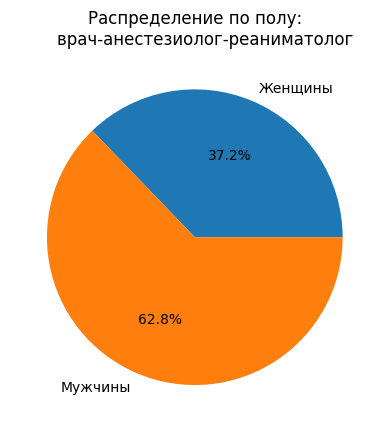

,count
sex,
Жен.,77
Муж.,130


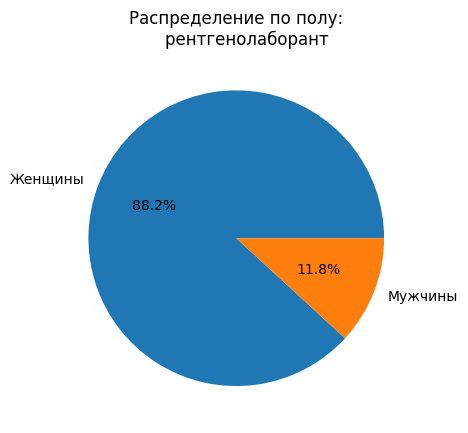

,count
sex,
Жен.,268
Муж.,36


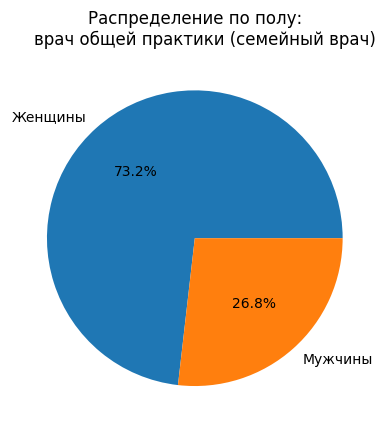

,count
sex,
Жен.,131
Муж.,48


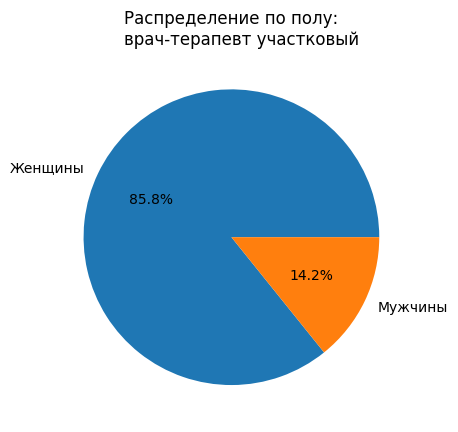

,count
sex,
Жен.,187
Муж.,31


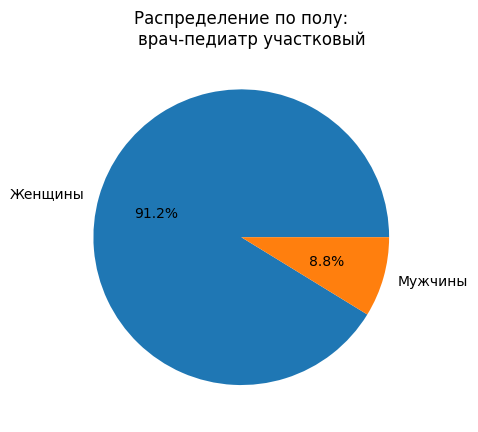

,count
sex,
Жен.,198
Муж.,19


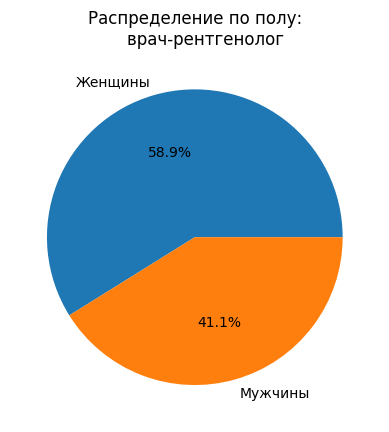

,count
sex,
Жен.,83
Муж.,58


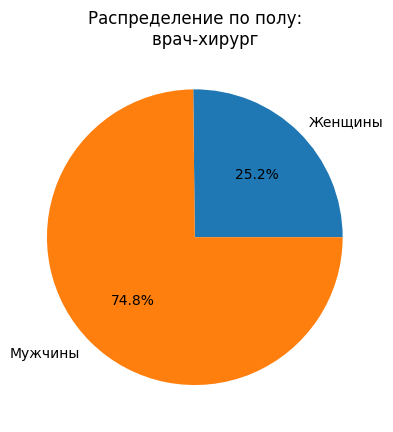

,count
sex,
Жен.,37
Муж.,110


In [33]:
# посмотрим круговые диаграммы распределения работников по полу для каждой специальности
for prof in data_stuff['profession'].unique():
    df = data_stuff[data_stuff['profession'] == prof].sort_values(by='sex')['sex']
    plt.title(f'Распределение по полу:\n\
    {prof}')
    labels = ['Женщины', 'Мужчины']
    plt.pie(df.value_counts(sort=False), labels=labels,  autopct='%.1f%%')
    plt.show()
    # также выведем количество работников каждого пола для каждой специальности
    display(df.value_counts(sort=False))

Почти во всех специальностях подавляющее большинство работников - женщины. Наибольший разрыв в количестве женщин и мужчин - среди врачей-педиатров участковых (91,2% женщин, 8,8% мужчин), наименьший - среди врачей-рентгенологов (58,9% женщин, 41,1% мужчин).

Мужчины составляют большинство только среди врачей-анастезиологов-реаниматологов и хирургов.

### Распределение по специальностям для каждого пола

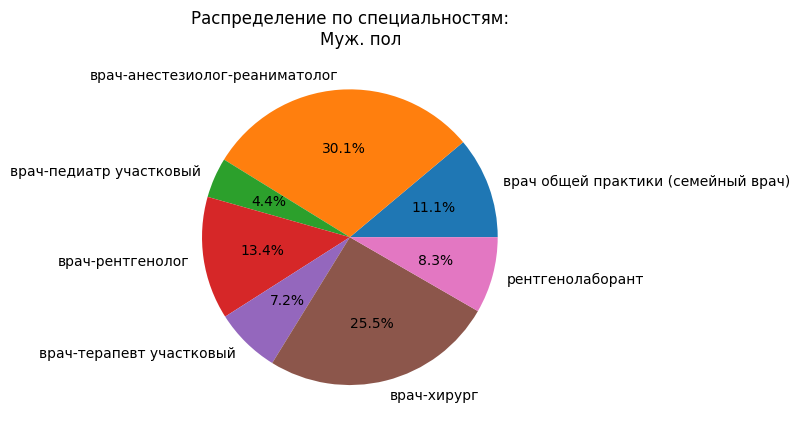

,count
profession,
врач общей практики (семейный врач),48
врач-анестезиолог-реаниматолог,130
врач-педиатр участковый,19
врач-рентгенолог,58
врач-терапевт участковый,31
врач-хирург,110
рентгенолаборант,36


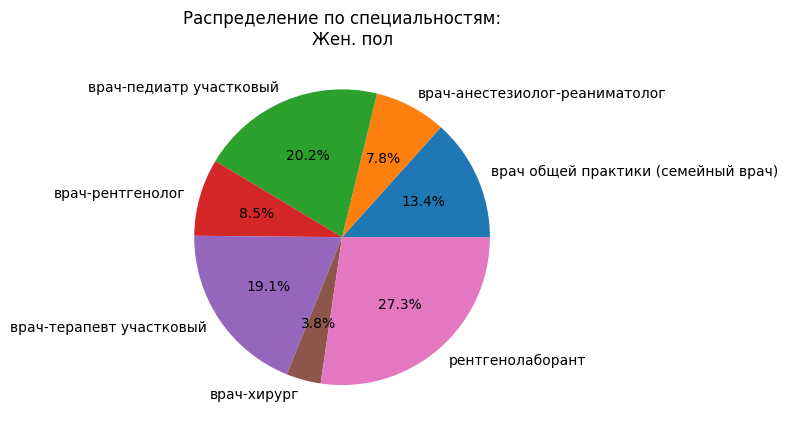

,count
profession,
врач общей практики (семейный врач),131
врач-анестезиолог-реаниматолог,77
врач-педиатр участковый,198
врач-рентгенолог,83
врач-терапевт участковый,187
врач-хирург,37
рентгенолаборант,268


In [34]:
# посмотрим круговые диаграммы распределения работников каждого пола по специальностям
for sex in data_stuff['sex'].unique():
    df = data_stuff[data_stuff['sex'] == sex].sort_values(by='profession')['profession']
    plt.title(f'Распределение по специальностям:\n\
    {sex} пол')
    labels = df.unique()
    plt.pie(df.value_counts(sort=False), labels=labels,  autopct='%.1f%%')
    plt.show()

    display(df.value_counts(sort=False))

Больше половины работников-мужчин составляют врачи-анестезиологи-реаниматологи и врачи-хирурги. Это также единственные специальности, в которых большинство работников составляют мужчины.

Распределение по специальностям среди женщин более равномерное, что связано с тем, что женщины составялют абсолютное большинство как среди всех работников, так и в большинстве специальностей.

## Распределение по возрасту

### Общее распределение по возрасту

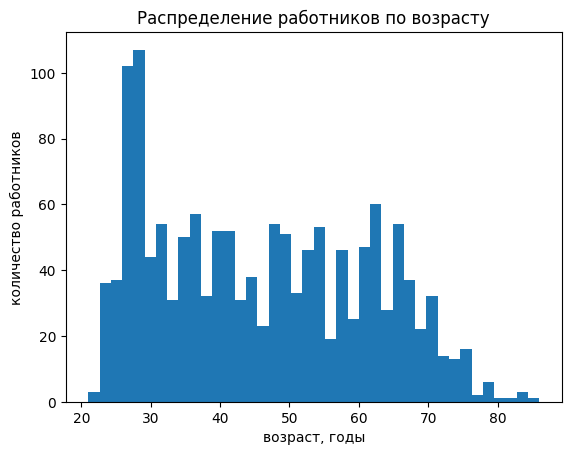

,age
count,1413.000000
mean,45.782732
std,15.185312
min,21.000000
25%,31.000000
50%,44.000000
75%,59.000000
max,86.000000


In [35]:
# построим гистограмму распределения всех работников по возрастам
plt.title('Распределение работников по возрасту')
plt.hist(data_stuff['age'], bins=40)
plt.xlabel('возраст, годы')
plt.ylabel('количество работников')
plt.show()
# также выведем описательную статистику
data_stuff['age'].describe()

Распределение работников по возрасту неравномерно. Отмечается большое молодых специалистов: 25% от общего числа работников - младше 31 года.

Половина от общего числа работников - в возрасте от 31 до 59 лет.

### Распределение по возрасту для специальностей

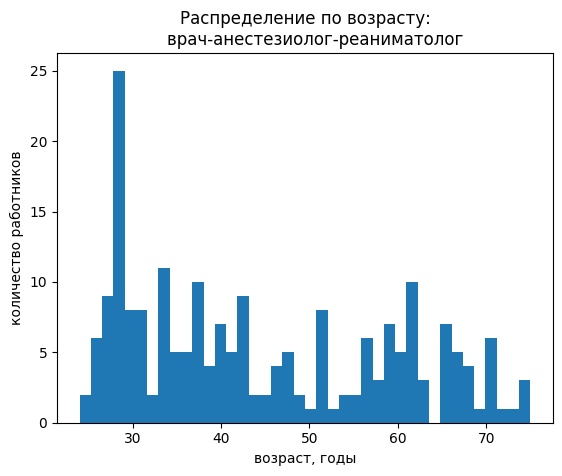

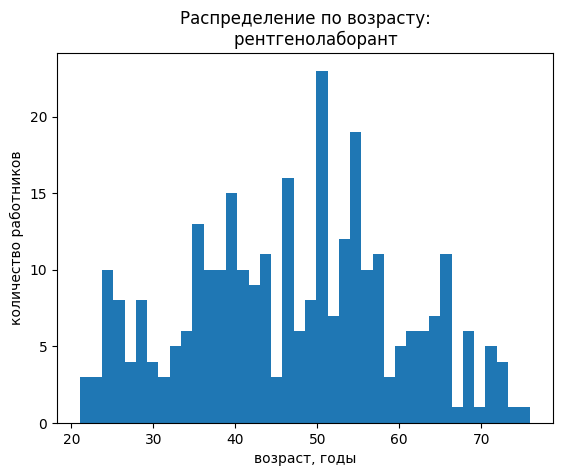

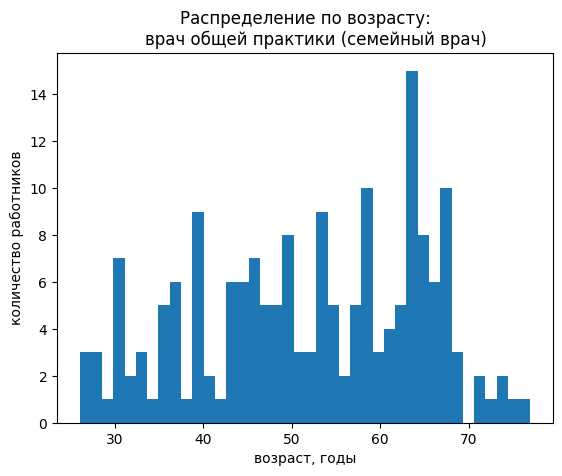

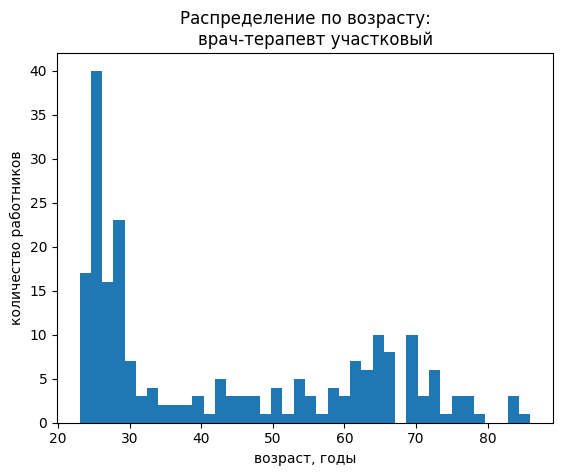

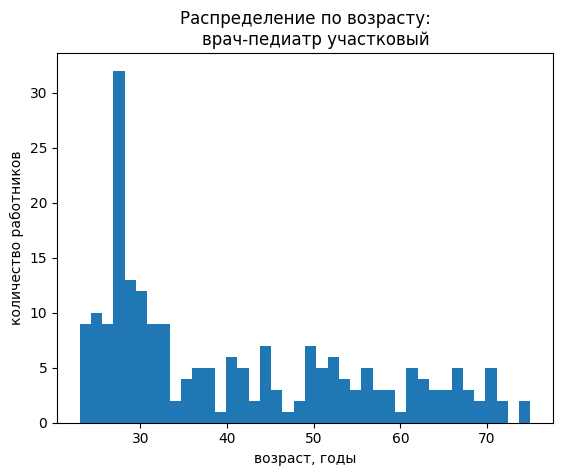

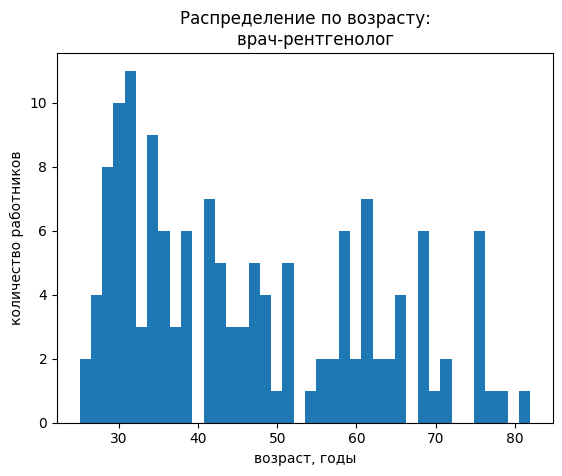

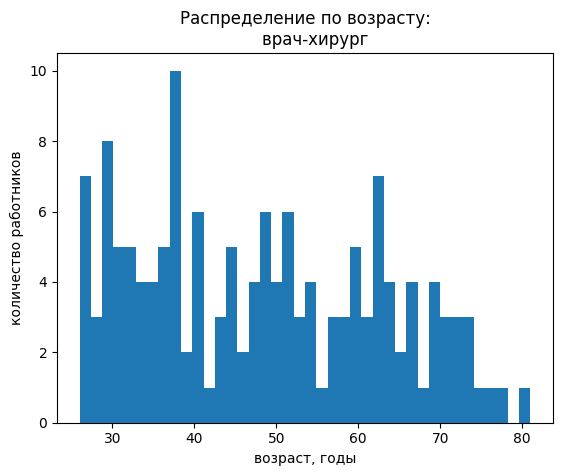

In [36]:
# построим гистограммы распределения работников по возрасту для каждой специальности
for prof in data_stuff['profession'].unique():
    plt.title(f'Распределение по возрасту:\n\
    {prof}')
    plt.hist(data_stuff[data_stuff['profession'] == prof]['age'], bins=40)
    plt.xlabel('возраст, годы')
    plt.ylabel('количество работников')
    plt.show()

Среди врачей-анестезиологов-реаниматологов, врачей-терапевтов участковых и врачей-педиатров участковых отмечается наиболее явное смещение в сторону молодых специалистов (младше 30 лет). Обратное отмечается среди врачей общей практики. В остальных специальностях столь ярко выраженного смещения нет.

## Вывод

1. Большинство медицинских работников, как в целом, так и по большинству специальностей, - женщины.
2. Мужчины составляют большинство среди врачей-хирургов и врачей-анестезиологов-реаниматологов. На эти же профессии приходится больше половины от общего числа работников-мужчин.
3. Наибольшее смещение в сторону работников младше 30 лет - среди врачей-анестезиологов-реаниматологов, врачей-терапевтов участковых и врачей-педиатров участковых.
4. Имеются работники старше 70 лет.

# Подготовка данных для Yandex DataLens

Для работы в Yandex DataLens необходимо:

- Объединить данные о медцинских работниках с данными о координатах медицинских организаций;
- Перевести координаты в формат геоточек;
- Категоризировать данные по типу медицинских организаций и расстоянию от Твери.

## Агрегирование данных

In [37]:
# создадим своднюу таблицу с числом работников каждой специальности по организациям
df = pd.pivot_table(data_stuff.sort_values(by='profession'), columns='profession', index=['organization'],
                    aggfunc="count", fill_value=0)['age']
# добавим новый столбец с индексами
df = df.reset_index()
df.head()

profession,organization,врач общей практики (семейный врач),врач-анестезиолог-реаниматолог,врач-педиатр участковый,врач-рентгенолог,врач-терапевт участковый,врач-хирург,рентгенолаборант
0,АВТОНОМНАЯ НЕКОММЕРЧЕСКАЯ ОРГАНИЗАЦИЯ ТВЕРСКОЙ...,0,0,0,1,0,0,1
1,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""КОНАКОВСКИЙ ЗАВОД СТАЛЬН...",1,0,0,0,0,0,0
2,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХ...,0,0,0,0,0,0,1
3,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХ...,2,1,4,0,4,2,4
4,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХ...,4,3,7,4,6,7,13


In [38]:
# выведем общую информацию о полученной таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   organization                         113 non-null    object
 1   врач общей практики (семейный врач)  113 non-null    int64 
 2   врач-анестезиолог-реаниматолог       113 non-null    int64 
 3   врач-педиатр участковый              113 non-null    int64 
 4   врач-рентгенолог                     113 non-null    int64 
 5   врач-терапевт участковый             113 non-null    int64 
 6   врач-хирург                          113 non-null    int64 
 7   рентгенолаборант                     113 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 7.2+ KB


In [39]:
# изучим описательную статистику по таблице
df.describe()

profession,врач общей практики (семейный врач),врач-анестезиолог-реаниматолог,врач-педиатр участковый,врач-рентгенолог,врач-терапевт участковый,врач-хирург,рентгенолаборант
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,1.584071,1.831858,1.920354,1.247788,1.929204,1.300885,2.690265
std,2.855839,4.735698,5.664964,2.880138,5.424345,2.441768,3.364944
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000
max,16.000000,37.000000,40.000000,17.000000,42.000000,14.000000,16.000000


In [40]:
# объединим полученную таблицу с данными о медицинских организациях
df = pd.merge(df, data_coord, on='organization', how='left')

# изучим полученную таблицу
about_table(df)

,organization,врач общей практики (семейный врач),врач-анестезиолог-реаниматолог,врач-педиатр участковый,врач-рентгенолог,врач-терапевт участковый,врач-хирург,рентгенолаборант,abbr_organization,district,address,coordinates
0,АВТОНОМНАЯ НЕКОММЕРЧЕСКАЯ ОРГАНИЗАЦИЯ ТВЕРСКОЙ...,0,0,0,1,0,0,1,"АНО ""БЕЛАЯ РОЗА""",городской округ город Тверь,"170100, Тверская область, город Тверь, Тверско...","56.86053266726136, 35.909560612319325"
1,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""КОНАКОВСКИЙ ЗАВОД СТАЛЬН...",1,0,0,0,0,0,0,"АО ""КЗСК""",Конаковский район,"171252, Тверская область, г. Конаково, ул. Про...","56.72231762064035, 36.78252888653642"
2,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХ...,0,0,0,0,0,0,1,"ГБУЗ ""КАШИНСКАЯ СП""",Кашинский городской округ,"Тверская область, г. Кашин, ул. Карла Маркса, ...","57.355114792071056, 37.6091387505305"
3,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХ...,2,1,4,0,4,2,4,"ГБУЗ ""КАШИНСКАЯ ЦРБ""",Кашинский городской округ,"171640, Тверская область, г. Кашин, ул. Вонжин...","57.35759162268202, 37.622431951037704"
4,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХ...,4,3,7,4,6,7,13,"ГБУЗ ""КИМРСКАЯ ЦРБ""",городской округ город Кимры,"171502, Тверская область, г. Кимры, Борковское...","56.83610336308383, 37.36593272292891"


Общие данные
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   organization                         113 non-null    object
 1   врач общей практики (семейный врач)  113 non-null    int64 
 2   врач-анестезиолог-реаниматолог       113 non-null    int64 
 3   врач-педиатр участковый              113 non-null    int64 
 4   врач-рентгенолог                     113 non-null    int64 
 5   врач-терапевт участковый             113 non-null    int64 
 6   врач-хирург                          113 non-null    int64 
 7   рентгенолаборант                     113 non-null    int64 
 8   abbr_organization                    113 non-null    object
 9   district                             113 non-null    object
 10  address                              113 non-null    object
 11  coordinates                     

None

Данные по столбцам
organization
['АВТОНОМНАЯ НЕКОММЕРЧЕСКАЯ ОРГАНИЗАЦИЯ ТВЕРСКОЙ ОБЛАСТИ "МЕДИЦИНСКИЙ ЦЕНТР "БЕЛАЯ РОЗА"'
 'АКЦИОНЕРНОЕ ОБЩЕСТВО "КОНАКОВСКИЙ ЗАВОД СТАЛЬНЫХ КОНСТРУКЦИЙ"'
 'ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ  УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "КАШИНСКАЯ СТОМАТОЛОГИЧЕСКАЯ ПОЛИКЛИНИКА"'
 'ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ  УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "КАШИНСКАЯ ЦЕНТРАЛЬНАЯ РАЙОННАЯ БОЛЬНИЦА"'
 'ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ  УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "КИМРСКАЯ ЦЕНТРАЛЬНАЯ РАЙОННАЯ БОЛЬНИЦА"'
 'ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ  УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "САНДОВСКАЯ ЦЕНТРАЛЬНАЯ РАЙОННАЯ БОЛЬНИЦА"'
 'ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ  ОБЛАСТИ "ОСТАШКОВСКАЯ ЦЕНТРАЛЬНАЯ РАЙОННАЯ БОЛЬНИЦА"'
 'ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ  "МАКСАТИХИНСКАЯ ЦЕНТРАЛЬНАЯ РАЙОННАЯ БОЛЬНИЦА"'
 'ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ТВЕРСКОЙ ОБЛАСТИ "АНДРЕАПОЛЬСКАЯ ЦЕНТРАЛЬНАЯ РАЙОННАЯ 

,organization,врач общей практики (семейный врач),врач-анестезиолог-реаниматолог,врач-педиатр участковый,врач-рентгенолог,врач-терапевт участковый,врач-хирург,рентгенолаборант,abbr_organization,district,address,coordinates
count,113,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113,113,113,113
unique,113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113,38,111,112
top,АВТОНОМНАЯ НЕКОММЕРЧЕСКАЯ ОРГАНИЗАЦИЯ ТВЕРСКОЙ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"АНО ""БЕЛАЯ РОЗА""",городской округ город Тверь,"170026, Тверская область, город Тверь, Комсомо...","56.85261396057918, 35.8811559111127"
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,59,2,2
mean,NaN,1.584071,1.831858,1.920354,1.247788,1.929204,1.300885,2.690265,NaN,NaN,NaN,NaN
std,NaN,2.855839,4.735698,5.664964,2.880138,5.424345,2.441768,3.364944,NaN,NaN,NaN,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
50%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
75%,NaN,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,NaN,NaN,NaN,NaN


Далее добавим сведения о медианном возрасте работников для каждой МО.


In [41]:
# создадим таблицу с медианным возрастом работников каждой МО
table_age = pd.pivot_table(data_stuff.sort_values(by='profession'), values='age', index=['organization'], aggfunc="median")
table_age.reset_index(inplace=True)
table_age.head()

,organization,age
0,АВТОНОМНАЯ НЕКОММЕРЧЕСКАЯ ОРГАНИЗАЦИЯ ТВЕРСКОЙ...,64.5
1,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""КОНАКОВСКИЙ ЗАВОД СТАЛЬН...",72.0
2,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХ...,38.0
3,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХ...,44.0
4,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХ...,40.5


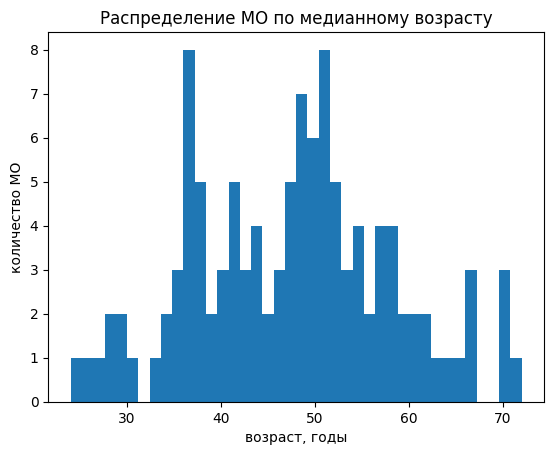

,age
count,113.000000
mean,47.526549
std,10.647527
min,24.000000
25%,39.000000
50%,48.000000
75%,54.000000
max,72.000000


In [42]:
# построим гистограмму распределения МО по медианному возрасту
plt.title('Распределение МО по медианному возрасту')
plt.hist(table_age['age'], bins=40)
plt.xlabel('возраст, годы')
plt.ylabel('количество МО')
plt.show()

# также изучим описательную статистику
table_age['age'].describe()

In [43]:
# добавим данные о возрасте к имеющейся таблице
df = pd.merge(df, table_age, on='organization', how='left')
df.head()

,organization,врач общей практики (семейный врач),врач-анестезиолог-реаниматолог,врач-педиатр участковый,врач-рентгенолог,врач-терапевт участковый,врач-хирург,рентгенолаборант,abbr_organization,district,address,coordinates,age
0,АВТОНОМНАЯ НЕКОММЕРЧЕСКАЯ ОРГАНИЗАЦИЯ ТВЕРСКОЙ...,0,0,0,1,0,0,1,"АНО ""БЕЛАЯ РОЗА""",городской округ город Тверь,"170100, Тверская область, город Тверь, Тверско...","56.86053266726136, 35.909560612319325",64.5
1,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""КОНАКОВСКИЙ ЗАВОД СТАЛЬН...",1,0,0,0,0,0,0,"АО ""КЗСК""",Конаковский район,"171252, Тверская область, г. Конаково, ул. Про...","56.72231762064035, 36.78252888653642",72.0
2,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХ...,0,0,0,0,0,0,1,"ГБУЗ ""КАШИНСКАЯ СП""",Кашинский городской округ,"Тверская область, г. Кашин, ул. Карла Маркса, ...","57.355114792071056, 37.6091387505305",38.0
3,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХ...,2,1,4,0,4,2,4,"ГБУЗ ""КАШИНСКАЯ ЦРБ""",Кашинский городской округ,"171640, Тверская область, г. Кашин, ул. Вонжин...","57.35759162268202, 37.622431951037704",44.0
4,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХ...,4,3,7,4,6,7,13,"ГБУЗ ""КИМРСКАЯ ЦРБ""",городской округ город Кимры,"171502, Тверская область, г. Кимры, Борковское...","56.83610336308383, 37.36593272292891",40.5


## Категоризация по типу МО

In [44]:
# зададим функцию, создающую список уникальных сокращённых названий МО
def abbr_func(row):
    """
    Функция получает из сокращённого названия медицинской организации
    аббревиатуру, обозначающую тип медицинской организации.
    """
    abbr = row['abbr_organization']
    return re.findall('^[А-Яа-я]*', abbr)[0]
# добавим список в имеющуюся таблицу
df['abbr_1'] = df.apply(abbr_func, axis=1)
# выведем уникальные значения списка
df['abbr_1'].unique()

array(['АНО', 'АО', 'ГБУЗ', 'ГКУЗ', 'ООО', 'ФБУЗ', 'ФГБОУ', 'ФГБУЗ',
       'ФКУЗ', 'ФИЛИАЛ', 'ЧУЗ', 'филиал'], dtype=object)

В данных представлены следующие типы МО:

1. АНО - автономная некомерческая организация,
2. АО - акционерное общество,
3. ГБУЗ - государственное бюджетное учреждение здравоохранения,
4. ГКУЗ - государственное казенное учреждение здравоохранения,
5. ООО - общество с ограниченной ответственностью,
6. ФБУЗ - федеральное бюджетное учреждение здравоохранения,
7. ФГБОУ - федеральное государственное бюджетное образовательное учреждение,
8. ФГБУЗ - федеральное государственное бюджетное учреждение здравоохранения,
9. ФКУЗ - федеральное казенное учреждение здравоохранения,
10. ЧУЗ - частное учреждение здравоохранения.

Также в данных присутствуют два *филиала*. Следует отдельно выяснить, каким организациям принадлежат эти филиалы.

In [45]:
# найдём МО, являющиеся филиалами
df[df['abbr_1'].str.lower() == 'филиал']

,organization,врач общей практики (семейный врач),врач-анестезиолог-реаниматолог,врач-педиатр участковый,врач-рентгенолог,врач-терапевт участковый,врач-хирург,рентгенолаборант,abbr_organization,district,address,coordinates,age,abbr_1
110,ФИЛИАЛ №1 ОБЩЕСТВА С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННО...,0,0,0,2,0,0,2,"ФИЛИАЛ №1 ООО ""МЦ-ТОМОГРАФИЯ ПЛЮС""",городской округ город Тверь,"г. Тверь, Беляковский переулок 9","56.85441516256905, 35.88541471297727",40.0,ФИЛИАЛ
112,филиал «Больница» Федерального казенного учреж...,0,1,0,0,0,0,0,"филиал ""Больница"" ФКУЗ МСЧ-69 ФСИН России",городской округ город Тверь,"170100, Тверская область, город Тверь, ул. Ваг...","56.85137868021394, 35.93789763522566",70.0,филиал


Один из филиалов относится к ООО, другой - к ФКУЗ.

In [46]:
# заменим сокращённые названия филиалов
df.loc[df.index == 110, 'abbr_1'] = 'ООО'
df.loc[df.index == 112, 'abbr_1'] = 'ФКУЗ'

In [47]:
# проверим сокращённые наименования
df['abbr_1'].unique()

array(['АНО', 'АО', 'ГБУЗ', 'ГКУЗ', 'ООО', 'ФБУЗ', 'ФГБОУ', 'ФГБУЗ',
       'ФКУЗ', 'ЧУЗ'], dtype=object)

Полученные типы МО можно распределить по группам в зависимости от формы собственности и источника финансирования. Таким образом можно получить следующие группы:

1. частные (АНО, АО, ООО, ЧУЗ),
2. государственные бюджетные (ГБУЗ),
3. казённые (ГКУЗ, ФКУЗ),
4. федеральные бюджетные (ФБУЗ, ФГБУЗ).

Кроме того, в отдельную группу следует выделить ФГБОУ.

In [48]:
# зададим функцию для категоризации МО
def abbr_category(row):
    """
    Функция присваивает каждой медицинской организации
    категорию в зависимости от типа этой организации.
    """
    if row['abbr_1'] in (['АНО', 'АО', 'ЧУЗ', 'ООО']):
        return 'частное'
    if row['abbr_1'] in (['ГКУЗ', 'ФКУЗ']):
        return 'казённое'
    if row['abbr_1'] in (['ФГБУЗ', 'ФБУЗ']):
        return 'федеральное бюджетное'
    if row['abbr_1'] in (['ФГБОУ']):
        return 'обарзовательное'
    if row['abbr_1'] in (['ГБУЗ']):
        return 'государственное бюджетное'
    return

In [49]:
# добавим в имеющуюся таблицу столбец с типами МО
df['type_MO'] = df.apply(abbr_category, axis=1)
# выведем количество МО каждого типа
df['type_MO'].value_counts()

,count
type_MO,
государственное бюджетное,68
частное,37
казённое,4
федеральное бюджетное,3
обарзовательное,1


Категоризация прошла успешно.

## Категоризация по удалённости от Твери

Удаление МО от центра Твери будет рассчитываться с помощью координат МО и координат центра Твери (56.8584, 35.9006).

In [50]:
# зададим функцию для рассчёта расстояния от центра Твери до МО
def haversin_func(row):
    """
    Функция рассчитывает расстояние от медицинской организации
    до центра Твери.
    """
    dist = haversine((56.8584, 35.9006), (float(i) for i in row.split(',')), Unit.KILOMETERS)
    return round(dist)

,distation
count,113.000000
mean,62.530973
std,74.048497
min,0.000000
25%,2.000000
50%,5.000000
75%,117.000000
max,263.000000


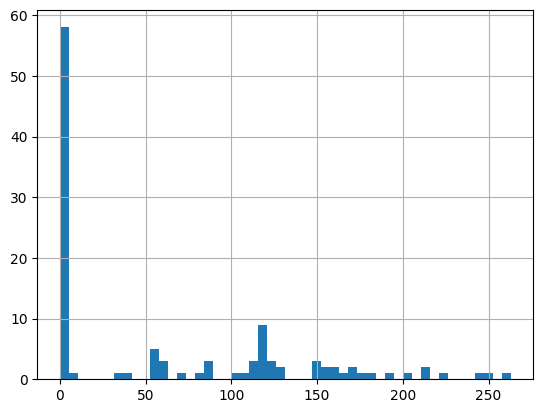

In [51]:
# добавим в имеющуюся таблицу столбец с расстоянием от МО до центра Твери
df['distation'] = df['coordinates'].apply(haversin_func)
df['distation'].hist(bins = 50)
df['distation'].describe()

75% МО находятся в радиусе 117 км от центра Твери.

Распределим МО на 5 групп по их удалённости от центра Твери.

In [52]:
# выделим 5 территориальных зон
bin_labels_5 = ['ближайшие', 'ближние', 'отдалённые', 'дальние', 'удалённые']
# выведем количество МО в каждой территориальной зоне
pd.cut(df['distation'], bins = 5, labels=bin_labels_5).value_counts(sort = False)

,count
distation,
ближайшие,61
ближние,14
отдалённые,23
дальние,9
удалённые,6


In [53]:
# добавим столбец с территориальными зонами
df['type_MO_dist'] = pd.cut(df['distation'], bins = 5, labels=bin_labels_5)
df.head()

,organization,врач общей практики (семейный врач),врач-анестезиолог-реаниматолог,врач-педиатр участковый,врач-рентгенолог,врач-терапевт участковый,врач-хирург,рентгенолаборант,abbr_organization,district,address,coordinates,age,abbr_1,type_MO,distation,type_MO_dist
0,АВТОНОМНАЯ НЕКОММЕРЧЕСКАЯ ОРГАНИЗАЦИЯ ТВЕРСКОЙ...,0,0,0,1,0,0,1,"АНО ""БЕЛАЯ РОЗА""",городской округ город Тверь,"170100, Тверская область, город Тверь, Тверско...","56.86053266726136, 35.909560612319325",64.5,АНО,частное,1,ближайшие
1,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""КОНАКОВСКИЙ ЗАВОД СТАЛЬН...",1,0,0,0,0,0,0,"АО ""КЗСК""",Конаковский район,"171252, Тверская область, г. Конаково, ул. Про...","56.72231762064035, 36.78252888653642",72.0,АО,частное,56,ближние
2,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХ...,0,0,0,0,0,0,1,"ГБУЗ ""КАШИНСКАЯ СП""",Кашинский городской округ,"Тверская область, г. Кашин, ул. Карла Маркса, ...","57.355114792071056, 37.6091387505305",38.0,ГБУЗ,государственное бюджетное,117,отдалённые
3,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХ...,2,1,4,0,4,2,4,"ГБУЗ ""КАШИНСКАЯ ЦРБ""",Кашинский городской округ,"171640, Тверская область, г. Кашин, ул. Вонжин...","57.35759162268202, 37.622431951037704",44.0,ГБУЗ,государственное бюджетное,118,отдалённые
4,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХ...,4,3,7,4,6,7,13,"ГБУЗ ""КИМРСКАЯ ЦРБ""",городской округ город Кимры,"171502, Тверская область, г. Кимры, Борковское...","56.83610336308383, 37.36593272292891",40.5,ГБУЗ,государственное бюджетное,89,ближние


## Преобразование формата координат

Для работы с Yandex DataLens необходимо преобразовать координаты в формат геоточек.

In [54]:
# зададим функцию для преобразования координат в геоточки
def return_coord(row):
    """
    Функция преобразовывает данные в формат геоточек.
    """
    row = str([float(i.strip()) for i in row.split(',')])
    return f"{row}"

In [55]:
# добавим столбец с геоточками
df['geopoint'] = df['coordinates'].apply(return_coord)
df.head()

,organization,врач общей практики (семейный врач),врач-анестезиолог-реаниматолог,врач-педиатр участковый,врач-рентгенолог,врач-терапевт участковый,врач-хирург,рентгенолаборант,abbr_organization,district,address,coordinates,age,abbr_1,type_MO,distation,type_MO_dist,geopoint
0,АВТОНОМНАЯ НЕКОММЕРЧЕСКАЯ ОРГАНИЗАЦИЯ ТВЕРСКОЙ...,0,0,0,1,0,0,1,"АНО ""БЕЛАЯ РОЗА""",городской округ город Тверь,"170100, Тверская область, город Тверь, Тверско...","56.86053266726136, 35.909560612319325",64.5,АНО,частное,1,ближайшие,"[56.86053266726136, 35.909560612319325]"
1,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""КОНАКОВСКИЙ ЗАВОД СТАЛЬН...",1,0,0,0,0,0,0,"АО ""КЗСК""",Конаковский район,"171252, Тверская область, г. Конаково, ул. Про...","56.72231762064035, 36.78252888653642",72.0,АО,частное,56,ближние,"[56.72231762064035, 36.78252888653642]"
2,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХ...,0,0,0,0,0,0,1,"ГБУЗ ""КАШИНСКАЯ СП""",Кашинский городской округ,"Тверская область, г. Кашин, ул. Карла Маркса, ...","57.355114792071056, 37.6091387505305",38.0,ГБУЗ,государственное бюджетное,117,отдалённые,"[57.355114792071056, 37.6091387505305]"
3,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХ...,2,1,4,0,4,2,4,"ГБУЗ ""КАШИНСКАЯ ЦРБ""",Кашинский городской округ,"171640, Тверская область, г. Кашин, ул. Вонжин...","57.35759162268202, 37.622431951037704",44.0,ГБУЗ,государственное бюджетное,118,отдалённые,"[57.35759162268202, 37.622431951037704]"
4,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХ...,4,3,7,4,6,7,13,"ГБУЗ ""КИМРСКАЯ ЦРБ""",городской округ город Кимры,"171502, Тверская область, г. Кимры, Борковское...","56.83610336308383, 37.36593272292891",40.5,ГБУЗ,государственное бюджетное,89,ближние,"[56.83610336308383, 37.36593272292891]"


## Сохранение датасета

In [56]:
# создадим копию имеющейся таблицы
df_for_xlsx = df.copy()

In [57]:
# выведем названия столбцов
df_for_xlsx.columns

Index(['organization', 'врач общей практики (семейный врач)',
       'врач-анестезиолог-реаниматолог', 'врач-педиатр участковый',
       'врач-рентгенолог', 'врач-терапевт участковый', 'врач-хирург',
       'рентгенолаборант', 'abbr_organization', 'district', 'address',
       'coordinates', 'age', 'abbr_1', 'type_MO', 'distation', 'type_MO_dist',
       'geopoint'],
      dtype='object')

Необходимо перевести названия столбцов на русский язык, а также удалить столбцы `coordinates`, `abbr_1`, `distation`, `address` со вспомогательной информацией.

In [58]:
# удалим столбцы со вспомогательной информацией
df_for_xlsx.drop(['coordinates','abbr_1','distation', 'address'], axis = 1, inplace= True)
df_for_xlsx.columns

Index(['organization', 'врач общей практики (семейный врач)',
       'врач-анестезиолог-реаниматолог', 'врач-педиатр участковый',
       'врач-рентгенолог', 'врач-терапевт участковый', 'врач-хирург',
       'рентгенолаборант', 'abbr_organization', 'district', 'age', 'type_MO',
       'type_MO_dist', 'geopoint'],
      dtype='object')

In [59]:
# переименуем столбцы с помощью словаря, созданного ранее
dict_reverse = { value:key for key,value in dict_coord.items() if value in df_for_xlsx.columns}
df_for_xlsx.rename(columns = dict_reverse, inplace = True)

In [60]:
dict_reverse = { value:key for key,value in dict_stuff.items() if value in  df_for_xlsx.columns}
df_for_xlsx.rename(columns = dict_reverse, inplace = True)
df_for_xlsx.columns

Index(['Организация по основной должности',
       'врач общей практики (семейный врач)', 'врач-анестезиолог-реаниматолог',
       'врач-педиатр участковый', 'врач-рентгенолог',
       'врач-терапевт участковый', 'врач-хирург', 'рентгенолаборант',
       'Сокращенное название организации', 'Округ/район', 'Возраст', 'type_MO',
       'type_MO_dist', 'geopoint'],
      dtype='object')

In [61]:
# переименуем оставшиеся 3 столбца
df_for_xlsx.rename(columns = {'type_MO': 'принадлежность',
                              'type_MO_dist': 'территориальная зона',
                              'geopoint': 'геоточка'}, inplace = True)

In [62]:
# приведём названия столбцов к нижнему регистру
df_for_xlsx.columns = [x.lower() for x in df_for_xlsx.columns]
df_for_xlsx.columns

Index(['организация по основной должности',
       'врач общей практики (семейный врач)', 'врач-анестезиолог-реаниматолог',
       'врач-педиатр участковый', 'врач-рентгенолог',
       'врач-терапевт участковый', 'врач-хирург', 'рентгенолаборант',
       'сокращенное название организации', 'округ/район', 'возраст',
       'принадлежность', 'территориальная зона', 'геоточка'],
      dtype='object')

In [63]:
# сохраним датасет в формате xlsx
df_for_xlsx.to_excel('for_datalens.xlsx', index=False)

#  Общий вывод

Данные подготовлены для работы в Yandex DataLens. Дальнейшая работа с данными будет проводиться в Yandex DataLens.

[Ссылка на дашборд в Yandex DataLens](https://datalens.yandex/oincak5t0fj8a)